# The Probability Density Function (PDF) - Lab

## Introduction

In this lab we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to: 

* Calculate the PDF from given dataset containing real valued random variables
* Plot density functions and comment on the shape of the plot
* Plot density functions using seaborn


## Let's get started!

We'll import all the required libraries for you for this lab.

In [71]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 
import seaborn as sns

#### Import the dataset 'weight-height.csv' as pandas dataframe . Calculate the mean and standard deviation for weights and heights for male and female individually. 

Hint : Use your pandas dataframe subsetting skills like loc(), iloc() and groupby()

In [62]:
df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [63]:
df_male = df[df['Gender'] == 'Male']


In [64]:
df_female = df[df['Gender'] == 'Female']


In [9]:
df_male['Height'].mean()

69.02634590621737

In [10]:
df_male['Height'].std()

2.8633622286606517

In [11]:
df_male['Weight'].mean()

187.0206206581929

In [12]:
df_male['Weight'].std()

19.781154516763813

In [14]:
df_female['Height'].mean()

63.708773603424916

In [15]:
df_female['Height'].std()

2.696284015765056

In [16]:
df_female['Weight'].mean()

135.8600930074687

In [17]:
df_female['Weight'].std()

19.022467805319007

In [18]:
# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

#### Plot overlapping normalized histograms for male and female heights - use binsize = 10, set alpha level so that overlap can be visualized

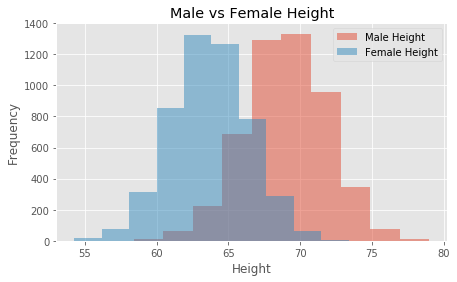

In [68]:
plt.figure(figsize=(7,4))
plt.hist(df_male['Height'], alpha=0.5, label = 'Male Height')
plt.hist(df_female['Height'], alpha=0.5, label = 'Female Height')

plt.title('Male vs Female Height')
plt.xlabel('Height')
plt.ylabel('Frequency')

plt.legend()
plt.show()
          


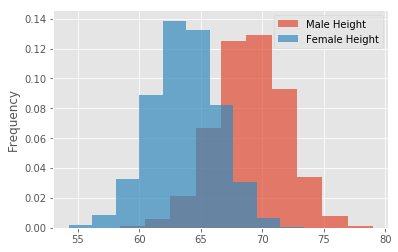

In [ ]:
# Record your observations - are these inline with your personal observations?
# separation of height is bimodal between males and females.  this is inline with my expectations


#### Write a function density() that takes in a random variable and calculates the density function using `np.hist` and interpolation. The function should return two lists carrying x and y coordinates for plotting the density function

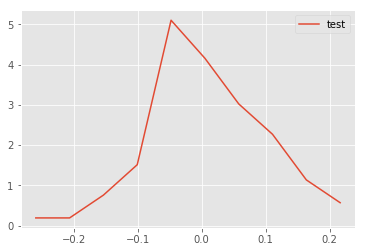

In [36]:
def density(x):
    n, bins = np.histogram(x, 10, density=1)
    # Initialize numpy arrays with zeros to store interpolated values
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)

    # Interpolate through histogram bins 
    # identify middle point between two neighbouring bins, in terms of x and y coords
    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]

    # plot the calculated curve
    return pdfx, pdfy
    
    


# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

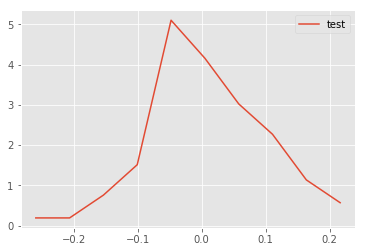

#### Add Overlapping density plots for male and female heights to the histograms plotted earlier

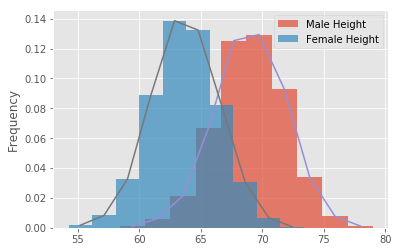

In [69]:
df_male.Height.plot.hist(bins = 10, density = True,  alpha = 0.7, label ="Male Height");
df_female.Height.plot.hist(bins = 10, density = True, alpha = 0.7, label = 'Female Height');
plt.legend()
x,y = density(df_male.Height)
plt.plot(x,y)
x,y = density(df_female.Height)
plt.plot(x,y)
plt.show()
           

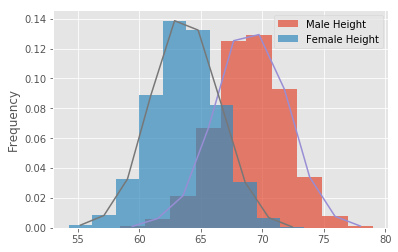

#### Repeat above exerice for male and female weights

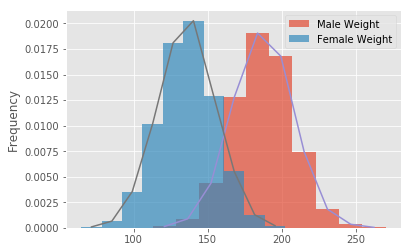

In [70]:
df_male.Weight.plot.hist(bins = 10, density = True,  alpha = 0.7, label ="Male Weight");
df_female.Weight.plot.hist(bins = 10, density = True, alpha = 0.7, label = 'Female Weight');
plt.legend()
x,y = density(df_male.Weight)
plt.plot(x,y)
x,y = density(df_female.Weight)
plt.plot(x,y)
plt.show()

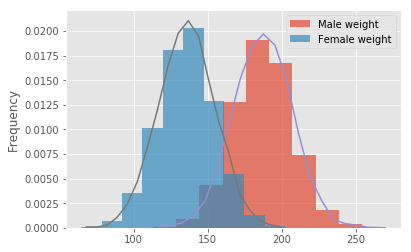

#### Write your observations in the cell below.

In [68]:
# Record your observations - are these inline with your personal observations?
#there is even more seperation (less crossover) between male and female weight capmpared to height

# So whats the takeaway when comparing male and female heights and weights 
# looks like both are normally distributed.  But the two groups are seperated when looking at Male and Female seperately



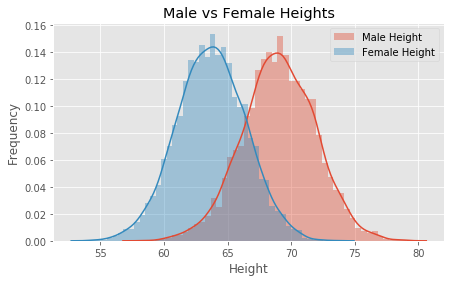

In [78]:
plt.figure(figsize=(7,4))
sns.distplot(df_male.Height, label = 'Male Height')
sns.distplot(df_female.Height, label = 'Female Height')
plt.title("Male vs Female Heights")
plt.ylabel('Frequency')
plt.legend()

#### Repeat Above experiments in seaborn and compare with your results. 

Text(0.5,1,'Comparing weights')

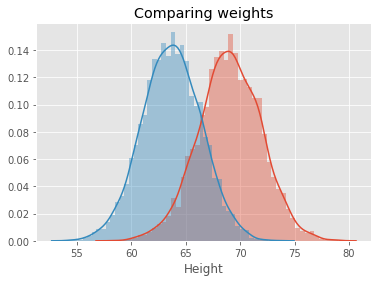

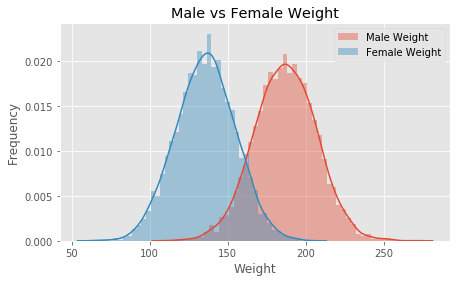

In [79]:
plt.figure(figsize=(7,4))
sns.distplot(df_male.Weight, label = 'Male Weight')
sns.distplot(df_female.Weight, label = 'Female Weight')
plt.title("Male vs Female Weight")
plt.ylabel('Frequency')
plt.legend()

Text(0.5,1,'Comparing Weights')

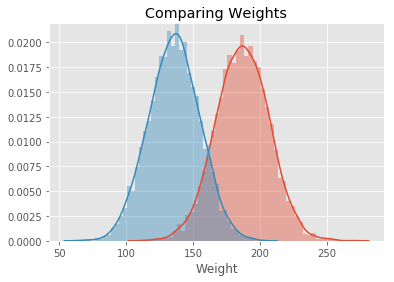

In [ ]:
# Your comments on the two approaches here. 
# are they similar ? what makes them different if they are ?
# similar but seaborn automatically adds the density plot with distplot

## Summary

In this lesson we saw how to build the probability density curves visually for given datasets and compare on the distribution visually by looking at the spread , center and overlap between data elements. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.